<a href="https://colab.research.google.com/github/yohan9569/Dacon/blob/main/%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9C%20%EC%82%AC%EC%9A%A9%EC%9E%90%20%EC%97%B0%EC%B2%B4%20%EC%98%88%EC%B8%A1(%EC%97%B0%EC%8A%B5%20%EB%8C%80%ED%9A%8C))/0810_for_share.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 0810

#### 결측치 처리
+ 희영님 버전을 살린다. (0의 의지)
+ R로 다시 bake

#### 변수 점검
#### CatBoost 성능 살리기
#### 살린 CatBoost 추가한 Stacking

In [ ]:
import os
from os.path import join

import multiprocessing
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

n_cpus = multiprocessing.cpu_count()

## 결측치 처리 버전 체크(R에서 결측치 처리했습니다.)
step_impute_bag(occyp_type, impute_with = imp_vars(income_type, edu_type, family_type, house_type))

In [ ]:
BASE_DIR = '/content/drive/MyDrive/T_academy/practice/ANACONDA_FILES/Camp'

# 원본
train_path = join(BASE_DIR, 'data', 'MDC14', 'train.csv')
test_path  = join(BASE_DIR, 'data', 'MDC14', 'test.csv')

data1 = pd.read_csv(train_path)
test1 = pd.read_csv(test_path)


# 희영 결측치 채운 버전
train_path = join(BASE_DIR,'daconProj', 'baked_train.csv')
val_path = join(BASE_DIR,'daconProj', 'baked_val.csv')
test_path  = join(BASE_DIR,'daconProj', 'baked_test.csv')

train = pd.read_csv(train_path)
val = pd.read_csv(val_path)
test2 = pd.read_csv(test_path)
# 나눴던 train 과 valid를 다시 합친다.
data2 = pd.concat([train, val], axis=0, ignore_index=True)


# 새로 bake
train_path = join(BASE_DIR,'daconProj', '0810baked_train2.csv')
test_path  = join(BASE_DIR,'daconProj', '0810baked_test2.csv')

data3 = pd.read_csv(train_path)
test3 = pd.read_csv(test_path)


# 새로 bake2 # 얘가 최종 선택
train_path = join(BASE_DIR,'daconProj', '0810baked_train3.csv')
test_path  = join(BASE_DIR,'daconProj', '0810baked_test3.csv')

data4 = pd.read_csv(train_path)
test4 = pd.read_csv(test_path)

In [ ]:
data1['credit'].value_counts(normalize=True)

2.0    0.641343
1.0    0.236875
0.0    0.121783
Name: credit, dtype: float64

In [ ]:
data1[data1['occyp_type'].isna()]['credit'].value_counts(normalize=True)

2.0    0.644474
1.0    0.237180
0.0    0.118345
Name: credit, dtype: float64

In [ ]:
data1[data1['occyp_type'].notna()]['credit'].value_counts(normalize=True)

2.0    0.639943
1.0    0.236738
0.0    0.123318
Name: credit, dtype: float64

occyp_type이 NA인 사람들의 credit분포가 특별히 전체 분포와 다르지 않은 것 같아서 한 집단으로 보지 않는 게 좋다고 생각했습니다.<br> 그래서 최대한 잘 쪼개주는 방법을 찾다가 선택한 것이 R의 step_impute_bag(Tree model을 통해 결측값을 채우는 함수)입니다.<br>
python으로도 비슷하게 구현해보려고 했지만, 똑같은 기능은 찾지 못했고, 비슷해보이는 걸로 했을 때는 뭔가 제대로 안 돌아갔습니다ㅠㅠ

In [ ]:
# 원본 비율
data1['occyp_type'].value_counts(normalize=True)

Laborers                 0.246746
Core staff               0.144701
Sales staff              0.138849
Managers                 0.118506
Drivers                  0.086131
High skill tech staff    0.056874
Accountants              0.049327
Medicine staff           0.047249
Cooking staff            0.024992
Security staff           0.023187
Cleaning staff           0.022039
Private service staff    0.013289
Low-skill Laborers       0.006945
Waiters/barmen staff     0.006781
Secretaries              0.005305
Realty agents            0.003445
HR staff                 0.003391
IT staff                 0.002242
Name: occyp_type, dtype: float64

In [ ]:
# 희영 버전(R에서 대부분의 전처리 한 버전) 비율
data2['occyp_type'].value_counts(normalize=True)

Laborers                 0.286918
Drivers                  0.140303
Managers                 0.136712
Core staff               0.126318
Sales staff              0.121140
High skill tech staff    0.041539
Accountants              0.035227
Medicine staff           0.033602
Cooking staff            0.017727
Security staff           0.016366
Cleaning staff           0.015535
Private service staff    0.009185
Low-skill Laborers       0.004800
Waiters/barmen staff     0.004687
Secretaries              0.003666
Realty agents            0.002381
HR staff                 0.002343
IT staff                 0.001550
Name: occyp_type, dtype: float64

In [ ]:
# 0810 버전1(R에서 변수들 factor처리 없이 step_impute_bag만 한 버전)
data3['occyp_type'].value_counts(normalize=True)

Laborers                 0.291000
Core staff               0.199002
Managers                 0.139623
Sales staff              0.122538
Drivers                  0.060438
High skill tech staff    0.039800
Accountants              0.035492
Medicine staff           0.033828
Cooking staff            0.017727
Security staff           0.016026
Cleaning staff           0.015913
Private service staff    0.009185
Low-skill Laborers       0.004800
Waiters/barmen staff     0.004687
Secretaries              0.003666
Realty agents            0.002381
HR staff                 0.002343
IT staff                 0.001550
Name: occyp_type, dtype: float64

In [ ]:
# 0810 버전2(R에서 변수들 factor처리 후 step_impute_bag만 한 버전, + 무직=0 처리) # 그래도 얘가 원본과 직업 유형 순서가 유사하다.
data4['occyp_type'].value_counts(normalize=True)

Laborers                 0.291908
Core staff               0.201913
Sales staff              0.121707
Managers                 0.118759
Drivers                  0.060362
Accountants              0.053899
High skill tech staff    0.039800
Medicine staff           0.033299
Cooking staff            0.017727
Security staff           0.016102
Cleaning staff           0.015913
Private service staff    0.009185
Low-skill Laborers       0.004800
Waiters/barmen staff     0.004687
Secretaries              0.003666
Realty agents            0.002381
HR staff                 0.002343
IT staff                 0.001550
Name: occyp_type, dtype: float64

In [ ]:
data4['occyp_type'].isna().sum()

0

In [ ]:
data4['occyp_type'].value_counts().sum()

26457

## 0810 버전2(factor처리, 무직=0 처리) 채택 후 다시 시작

In [ ]:
BASE_DIR = '/content/drive/MyDrive/T_academy/practice/ANACONDA_FILES/Camp'
# 새로 bake2
train_path = join(BASE_DIR,'daconProj', '0810baked_train3.csv')
test_path  = join(BASE_DIR,'daconProj', '0810baked_test3.csv')

data = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [ ]:
data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,Managers,2,-6,1
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3,-5,1
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2,-22,2
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2,-37,0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2,-26,2


In [ ]:
# 0으로 잘 변환됐다.
data['DAYS_EMPLOYED'].value_counts()

 0        4438
-401        57
-1539       47
-200        45
-2087       44
          ... 
-2132        1
-1452        1
-4305        1
-4401        1
-12278       1
Name: DAYS_EMPLOYED, Length: 3470, dtype: int64

In [ ]:
data1['DAYS_EMPLOYED'].value_counts()

 365243    4438
-401         57
-1539        47
-200         45
-2087        44
           ... 
-8171         1
-12253        1
-6060         1
-1898         1
-2103         1
Name: DAYS_EMPLOYED, Length: 3470, dtype: int64

## 슥 보기

In [ ]:
data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,Managers,2,-6,1
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3,-5,1
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2,-22,2
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2,-37,0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2,-26,2


In [ ]:
data.shape

(26457, 20)

In [ ]:
data.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,-2198.529538,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,2370.140530,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,0.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     26457 non-null  object 
 17  family_size    26457 non-null  int64  
 18  begin_

In [ ]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,0,1,0,1,0,Laborers,2,-60
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2,-36
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2,-40
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2,-41
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2,-8


In [ ]:
test.shape

(10000, 19)

In [ ]:
test.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
count,10000.00000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,31456.50000,0.434700,1.850433e+05,-16020.466400,-2205.046700,1.0,0.227600,0.296300,0.085600,2.202700,-26.272400
std,2886.89568,0.729102,1.015398e+05,4197.672887,2358.038992,0.0,0.419304,0.456648,0.279786,0.898272,16.348557
min,26457.00000,0.000000,2.700000e+04,-25152.000000,-15661.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,28956.75000,0.000000,1.215000e+05,-19483.250000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000
50%,31456.50000,0.000000,1.575000e+05,-15606.000000,-1577.000000,1.0,0.000000,0.000000,0.000000,2.000000,-25.000000
75%,33956.25000,1.000000,2.250000e+05,-12539.000000,-410.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000
max,36456.00000,5.000000,1.575000e+06,-7489.000000,0.000000,1.0,1.000000,1.000000,1.000000,7.000000,0.000000


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10000 non-null  int64  
 1   gender         10000 non-null  object 
 2   car            10000 non-null  object 
 3   reality        10000 non-null  object 
 4   child_num      10000 non-null  int64  
 5   income_total   10000 non-null  float64
 6   income_type    10000 non-null  object 
 7   edu_type       10000 non-null  object 
 8   family_type    10000 non-null  object 
 9   house_type     10000 non-null  object 
 10  DAYS_BIRTH     10000 non-null  int64  
 11  DAYS_EMPLOYED  10000 non-null  int64  
 12  FLAG_MOBIL     10000 non-null  int64  
 13  work_phone     10000 non-null  int64  
 14  phone          10000 non-null  int64  
 15  email          10000 non-null  int64  
 16  occyp_type     10000 non-null  object 
 17  family_size    10000 non-null  int64  
 18  begin_m

## 데이터 전처리

In [ ]:
# 결측치는 이미 채워져있다. step_impute_bag(occyp_type, impute_with = imp_vars(income_type, edu_type, family_type, house_type))

# child_num 원본 기준 7명 초과시 제거
data = data[data['child_num'] <= 7]

In [ ]:
label = data['credit'] # 처음엔 데이터 불러오자마자 label로 담았더니 data와 label 갯수가 안 맞아서 전처리 후에 분리

## Feature Engineering

In [ ]:
# 불필요한 컬럼 제거
data.drop(columns=['index', 'credit', 'FLAG_MOBIL'], inplace=True)
test.drop(columns=['index', 'FLAG_MOBIL'],         inplace=True)

In [ ]:
# 무직자 0으로는 이미 만들었고, 양수로 변환

neg_feats = ['DAYS_BIRTH', 'begin_month', 'DAYS_EMPLOYED']
for feat in neg_feats:
    data[feat]=np.abs(data[feat])
    test[feat]=np.abs(test[feat])

In [ ]:
for df in [data,test]:
  # 나이
  df['Age'] = df['DAYS_BIRTH'] // 365 # 희영님 버전은 scaling, trasformatioin 다 된 상태라 이 변수 만들기가 어려웠습니다. 그래서 다시 bake.
  # 근속년수
  df['EMPLOYED'] = df['DAYS_EMPLOYED'] // 365
  # 능력
  df['ability'] = df['income_total'] / (df['DAYS_BIRTH'] + df['DAYS_EMPLOYED'])
  # 돈 들어가는 사람
  df['income_per'] = df['income_total'] / df['family_size']
  # 중복
  df['ID'] = \
  df['child_num'].astype(str) + '_' + df['income_total'].astype(str) + '_' +\
  df['DAYS_BIRTH'].astype(str) + '_' + df['DAYS_EMPLOYED'].astype(str) + '_' +\
  df['work_phone'].astype(str) + '_' + df['phone'].astype(str) + '_' +\
  df['email'].astype(str) + '_' + df['family_size'].astype(str) + '_' +\
  df['gender'].astype(str) + '_' + df['car'].astype(str) + '_' +\
  df['reality'].astype(str) + '_' + df['income_type'].astype(str) + '_' +\
  df['edu_type'].astype(str) + '_' + df['family_type'].astype(str) + '_' +\
  df['house_type'].astype(str) + '_' + df['occyp_type'].astype(str)

In [ ]:
data.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,Age,EMPLOYED,ability,income_per,ID
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,Managers,2,6,38,12,10.882416,101250.0,0_202500.0_13899_4709_0_0_0_2_F_N_N_Commercial...
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,0,0,1,Laborers,3,5,31,4,19.156347,82500.0,1_247500.0_11380_1540_0_0_1_3_F_N_Y_Commercial...
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,0,1,0,Managers,2,22,52,12,19.131840,225000.0,0_450000.0_19087_4434_0_1_0_2_M_Y_Y_Working_Hi...
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,0,1,0,Sales staff,2,37,41,5,11.786962,101250.0,0_202500.0_15088_2092_0_1_0_2_F_N_Y_Commercial...
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,15037,2105,0,0,0,Managers,2,26,41,5,9.187959,78750.0,0_157500.0_15037_2105_0_0_0_2_F_Y_Y_State serv...


In [ ]:
test.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,Age,EMPLOYED,ability,income_per,ID
0,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,21990,0,0,1,0,Laborers,2,60,60,0,5.115962,56250.0,0_112500.0_21990_0_0_1_0_2_M_Y_N_Pensioner_Sec...
1,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,18964,8671,0,1,0,Core staff,2,36,51,23,4.885109,67500.0,0_135000.0_18964_8671_0_1_0_2_F_N_Y_State serv...
2,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,15887,217,1,1,0,Laborers,2,40,43,0,4.307750,34686.0,0_69372.0_15887_217_1_1_0_2_F_N_Y_Working_Seco...
3,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,19270,2531,1,0,0,Drivers,2,41,52,6,5.160314,56250.0,0_112500.0_19270_2531_1_0_0_2_M_Y_N_Commercial...
4,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,17822,9385,1,0,0,Managers,2,8,48,25,8.269931,112500.0,0_225000.0_17822_9385_1_0_0_2_F_Y_Y_State serv...


천: 컬럼을 정리한다는 것은 EDA가 한 바퀴는 돌았다는 뜻.

In [ ]:
cat_columns = [c for c, t in zip(data.dtypes.index, data.dtypes) if t == 'O']
num_columns = [c for c    in data.columns if c not in cat_columns]

print('Categorical Columns: \n{}\n'.format(cat_columns))
print('Numeric Columns: \n{}'.format(num_columns))

Categorical Columns: 
['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'ID']

Numeric Columns: 
['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'work_phone', 'phone', 'email', 'family_size', 'begin_month', 'Age', 'EMPLOYED', 'ability', 'income_per']


In [ ]:
# 캣부스트용. 인코딩 없이 던져줄 거라서
cat_columns2 = cat_columns.copy()

In [ ]:
# 인코딩할 때 기본적으로 OneHotEncoding인데, ID는 그러기엔 너무 종류가 많아서 Ordinal 사용.
cat_columns.remove("ID")
cat_columns

['gender',
 'car',
 'reality',
 'income_type',
 'edu_type',
 'family_type',
 'house_type',
 'occyp_type']

In [ ]:
cat_columns2

['gender',
 'car',
 'reality',
 'income_type',
 'edu_type',
 'family_type',
 'house_type',
 'occyp_type',
 'ID']

#### 라벨 데이터 인코딩

In [ ]:
label = label.astype(int)

#### 전처리 프로세스 함수로 작성

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 80 kB 4.4 MB/s 


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from category_encoders.ordinal import OrdinalEncoder

In [ ]:
def preprocess(x_train, x_valid, x_test):
    tmp_x_train = x_train.copy()
    tmp_x_valid = x_valid.copy()
    tmp_x_test  = x_test.copy()

    tmp_x_train.reset_index(drop=True, inplace=True)
    tmp_x_valid.reset_index(drop=True, inplace=True)

    # 결측치 처리 이미 돼 있으므로 주석처리
    # num_imputer = IterativeImputer().fit(tmp_x_train[num_columns])
    # tmp_x_train[num_columns] = num_imputer.transform(tmp_x_train[num_columns])
    # tmp_x_valid[num_columns] = num_imputer.transform(tmp_x_valid[num_columns])
    # tmp_x_test[num_columns]  = num_imputer.transform(tmp_x_test[num_columns])

    # cat_imputer = SimpleImputer(strategy = "most_frequent").fit(tmp_x_train[cat_columns])
    # tmp_x_train[cat_columns] = cat_imputer.transform(tmp_x_train[cat_columns])
    # tmp_x_valid[cat_columns] = cat_imputer.transform(tmp_x_valid[cat_columns])
    # tmp_x_test[cat_columns]  = cat_imputer.transform(tmp_x_test[cat_columns])


    # 스케일링(스탠다드)
    scaler = StandardScaler().fit(tmp_x_train[num_columns])
    tmp_x_train[num_columns] = scaler.transform(tmp_x_train[num_columns])
    tmp_x_valid[num_columns] = scaler.transform(tmp_x_valid[num_columns])
    tmp_x_test[num_columns] = scaler.transform(tmp_x_test[num_columns])


    # ID 컬럼은 따로 ordinal
    encoder = OrdinalEncoder()
    tmp_x_train["ID"] = encoder.fit_transform(tmp_x_train["ID"])
    tmp_x_valid["ID"] = encoder.transform(tmp_x_valid["ID"])
    tmp_x_test["ID"] = encoder.transform(tmp_x_test["ID"])

    tmp_x_train['ID'] = tmp_x_train['ID'].astype('int64')
    tmp_x_valid['ID'] = tmp_x_valid['ID'].astype('int64')
    tmp_x_test['ID'] = tmp_x_test['ID'].astype('int64')


    # 인코딩(원핫인코딩)
    ohe = OneHotEncoder(sparse = False)
    ohe.fit(tmp_x_train[cat_columns])

    ohe_columns = list()
    for c in ohe.categories_:
        ohe_columns += c.tolist()

    tmp_x_train_cat = pd.DataFrame(ohe.transform(tmp_x_train[cat_columns]), columns=ohe_columns)
    tmp_x_valid_cat = pd.DataFrame(ohe.transform(tmp_x_valid[cat_columns]), columns=ohe_columns)
    tmp_x_test_cat  = pd.DataFrame(ohe.transform(tmp_x_test[cat_columns]), columns=ohe_columns)
    # 원래 cat_columns drop
    tmp_x_train.drop(columns=cat_columns, inplace=True)
    tmp_x_valid.drop(columns=cat_columns, inplace=True)
    tmp_x_test.drop(columns=cat_columns, inplace=True)
    # 원본과 concat
    tmp_x_train = pd.concat([tmp_x_train, tmp_x_train_cat], axis=1)
    tmp_x_valid = pd.concat([tmp_x_valid, tmp_x_valid_cat], axis=1)
    tmp_x_test = pd.concat([tmp_x_test, tmp_x_test_cat], axis=1)


    # return tmp_x_train, tmp_x_valid, tmp_x_test
    return tmp_x_train.values, tmp_x_valid.values, tmp_x_test.values

In [ ]:
# 캣부스트 용. 인코딩이 없다.
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from category_encoders.ordinal import OrdinalEncoder

def preprocess2(x_train, x_valid, x_test):
    tmp_x_train = x_train.copy()
    tmp_x_valid = x_valid.copy()
    tmp_x_test  = x_test.copy()

    tmp_x_train.reset_index(drop=True, inplace=True)
    tmp_x_valid.reset_index(drop=True, inplace=True)


    # 스케일링(스탠다드)
    scaler = StandardScaler().fit(tmp_x_train[num_columns])
    tmp_x_train[num_columns] = scaler.transform(tmp_x_train[num_columns])
    tmp_x_valid[num_columns] = scaler.transform(tmp_x_valid[num_columns])
    tmp_x_test[num_columns] = scaler.transform(tmp_x_test[num_columns])

    return tmp_x_train, tmp_x_valid, tmp_x_test # 캣부스트에 던져줄 때 컬럼명이 있어야 한다.
    # return tmp_x_train.values, tmp_x_valid.values, tmp_x_test.values

## 모델 학습

In [ ]:
!pip install catboost

     |████████████████████████████████| 67.4 MB 28 kB/s 


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, log_loss

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool

#### Only CatBoost

In [ ]:
n_splits=15
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

val_scores = list()

cat_pred = np.zeros((data.shape[0], 3))
cat_pred_test = np.zeros((test.shape[0], 3))


for i, (trn_idx, val_idx) in enumerate(skf.split(data, label)):
    x_train, y_train = data.iloc[trn_idx, :], label.iloc[trn_idx,]
    x_valid, y_valid = data.iloc[val_idx, :], label.iloc[val_idx,]

    # 전처리
    x_train, x_valid, x_test = preprocess2(x_train, x_valid, test) # values로 받으면 안 된다.

    # 모델 정의
    model_cat = CatBoostClassifier()

    # 모델 학습
    # model_cat.fit(x_train, y_train)
    model_cat.fit(x_train, y_train,
                  eval_set=[(x_train, y_train), (x_valid, y_valid)],
                  early_stopping_rounds=100,
                  cat_features=cat_columns2,
                  verbose=100)

#     # 결과 담기
#     cat_pred[val_idx] += model_cat.predict_proba(x_valid)
#     cat_pred_test     += model_cat.predict_proba(x_test) / n_splits

#     print(f'CV Log Loss Score: {log_loss(y_valid, cat_pred[val_idx]):.6f}')

# print(f'\tLog Loss: {log_loss(label, cat_pred):.6f}')


    # 훈련, 검증 데이터 log_loss 확인
    trn_logloss = log_loss(y_train, model_cat.predict_proba(x_train))
    val_logloss = log_loss(y_valid, model_cat.predict_proba(x_valid))
    print('{} Fold, train logloss : {:.4f}4, validation logloss : {:.4f}'.format(i, trn_logloss, val_logloss))

    val_scores.append(val_logloss)

    # 결과 담기
    cat_pred_test     += model_cat.predict_proba(x_test) / n_splits


# 교차 검증 log loss 평균 계산하기
print('Cross Validation Score : {:.5f}'.format(np.mean(val_scores)))

Learning rate set to 0.115127
0:	learn: 1.0343221	test: 1.0341873	test1: 1.0322884	best: 1.0322884 (0)	total: 255ms	remaining: 4m 14s
100:	learn: 0.7072180	test: 0.4896542	test1: 0.6433501	best: 0.6433501 (100)	total: 12.9s	remaining: 1m 54s
200:	learn: 0.6901478	test: 0.4795559	test1: 0.6413276	best: 0.6411285 (191)	total: 28.7s	remaining: 1m 54s
300:	learn: 0.6750176	test: 0.4739424	test1: 0.6400732	best: 0.6396549 (263)	total: 44.3s	remaining: 1m 42s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6396548581
bestIteration = 263

Shrink model to first 264 iterations.
0 Fold, train logloss : 0.47574, validation logloss : 0.6397
Learning rate set to 0.115127
0:	learn: 1.0347468	test: 1.0346041	test1: 1.0339981	best: 1.0339981 (0)	total: 163ms	remaining: 2m 42s
100:	learn: 0.7069656	test: 0.4892810	test1: 0.6634810	best: 0.6634585 (99)	total: 12.7s	remaining: 1m 53s
200:	learn: 0.6897199	test: 0.4797609	test1: 0.6605156	best: 0.6603667 (196)	total: 28s	remaining: 1m

Cross Validation Score : 0.66662

(코드 공유 후 생각나서 찍어 봄)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def plot_feature_importance(importance, names, model_type):

    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

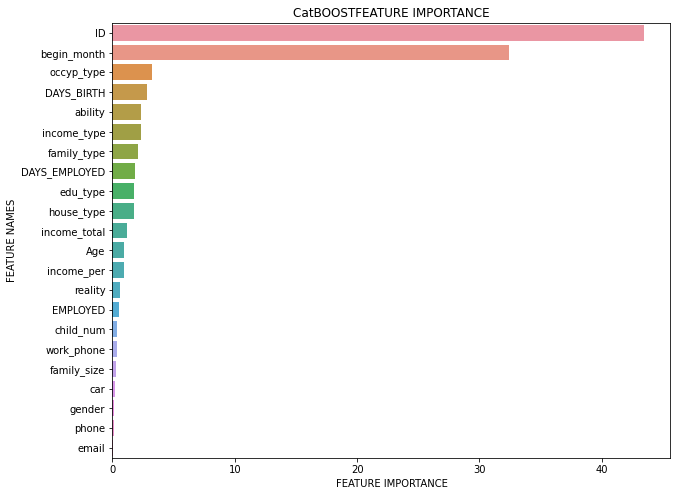

In [ ]:
plot_feature_importance(model_cat.get_feature_importance(), x_train.columns,'CatBOOST')

In [ ]:
submit_path = join(BASE_DIR, 'data', 'MDC14', 'sample_submission.csv')

submit = pd.read_csv(submit_path)
submit

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0
...,...,...,...,...
9995,36452,0,0,0
9996,36453,0,0,0
9997,36454,0,0,0
9998,36455,0,0,0


In [ ]:
submit.iloc[:, 1:] = cat_pred_test
submit

,index,0,1,2
0,26457,0.107860,0.156446,0.735694
1,26458,0.331792,0.228560,0.439647
2,26459,0.036927,0.068426,0.894647
3,26460,0.050024,0.079965,0.870010
4,26461,0.079345,0.224892,0.695763
...,...,...,...,...
9995,36452,0.073351,0.236834,0.689815
9996,36453,0.335211,0.178893,0.485895
9997,36454,0.042407,0.103435,0.854158
9998,36455,0.146144,0.302262,0.551594


In [ ]:
submit.to_csv('/content/drive/MyDrive/T_academy/practice/ANACONDA_FILES/Camp/daconProj/0810_only_cat_0_666615_submit.csv', index=False)

#### 이 버전을 stacking & oof 에 적용

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, log_loss

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool

In [ ]:
val_scores = list()
# 결과 값들을 stacking 해야하기 때문에, (모델 개수, 샘플의 수, 3) 라는 차원으로 구성됩니다.
oof_train = np.zeros((7, data.shape[0], 3)) # 캣부스트가 추가되어 6 -> 7로 증가했습니다.
oof_pred  = np.zeros((7, test.shape[0], 3))

n_splits=15
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

for i, (trn_idx, val_idx) in enumerate(skf.split(data, label)):
    x_train, y_train = data.iloc[trn_idx, :], label.iloc[trn_idx,]
    x_valid, y_valid = data.iloc[val_idx, :], label.iloc[val_idx,]

    # 전처리
    x_train, x_valid, x_test = preprocess(x_train, x_valid, test)

    # 모델 정의
    models = [RandomForestClassifier(n_estimators=200, max_depth=5,  random_state=42, n_jobs=(n_cpus-1)),
              RandomForestClassifier(n_estimators=150, max_depth=8, random_state=42, n_jobs=(n_cpus-1)),
              XGBClassifier(n_estimators=200, max_depth=5, random_state=42, n_jobs=(n_cpus-1)),
              XGBClassifier(n_estimators=150, max_depth=8, random_state=42, n_jobs=(n_cpus-1)),
              LGBMClassifier(n_estimators=200, max_depth=5, random_state=42, n_jobs=(n_cpus-1)),
              LGBMClassifier(n_estimators=150, max_depth=8, random_state=42, n_jobs=(n_cpus-1))]

    for j, model in enumerate(models):
        # 모델 학습
        model.fit(x_train, y_train)

        # j번째 칸에 맞는 결과 담기.
        oof_train[j, val_idx,] += model.predict_proba(x_valid)
        oof_pred[j, :,]        += model.predict_proba(x_test) / n_splits

    ### catboost ###
    x_train, y_train = data.iloc[trn_idx, :], label.iloc[trn_idx,]
    x_valid, y_valid = data.iloc[val_idx, :], label.iloc[val_idx,]

    # 전처리(가 위와 다르다.)
    x_train, x_valid, x_test = preprocess2(x_train, x_valid, test) # values로 받으면 안 된다.

    # 모델 정의
    model_cat = CatBoostClassifier()

    # 모델 학습
    # model_cat.fit(x_train, y_train) # cat_features를 쓸 때 성능이 훨씬 좋았다(실험적으로ㅎㅎ)
    model_cat.fit(x_train, y_train,
                  eval_set=[(x_train, y_train), (x_valid, y_valid)],
                  early_stopping_rounds=100,
                  cat_features=cat_columns2,
                  verbose=100)

    # 결과 담기, 칸에 맞춰서
    oof_train[-1, val_idx,] += model_cat.predict_proba(x_valid)
    oof_pred[-1, :,]         += model_cat.predict_proba(x_test) / n_splits


    print(f'{i} Fold, ...')

Learning rate set to 0.115127
0:	learn: 1.0343221	test: 1.0341873	test1: 1.0322884	best: 1.0322884 (0)	total: 179ms	remaining: 2m 58s
100:	learn: 0.7072180	test: 0.4896542	test1: 0.6433501	best: 0.6433501 (100)	total: 12.9s	remaining: 1m 54s
200:	learn: 0.6901478	test: 0.4795559	test1: 0.6413276	best: 0.6411285 (191)	total: 28.7s	remaining: 1m 54s
300:	learn: 0.6750176	test: 0.4739424	test1: 0.6400732	best: 0.6396549 (263)	total: 44.4s	remaining: 1m 43s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6396548581
bestIteration = 263

Shrink model to first 264 iterations.
0 Fold, ...
Learning rate set to 0.115127
0:	learn: 1.0347468	test: 1.0346041	test1: 1.0339981	best: 1.0339981 (0)	total: 167ms	remaining: 2m 47s
100:	learn: 0.7069656	test: 0.4892810	test1: 0.6634810	best: 0.6634585 (99)	total: 12.7s	remaining: 1m 53s
200:	learn: 0.6897199	test: 0.4797609	test1: 0.6605156	best: 0.6603667 (196)	total: 28s	remaining: 1m 51s
300:	learn: 0.6741605	test: 0.4746163	test1:

In [ ]:
oof_train.T.shape

(3, 26453, 7)

앞의 차원은 리스트 차원으로 들어간다. (2만, 18) 짜리가 6개 담긴 리스트

In [ ]:
# 모은 train, test의 예측 값을 new_x_train, new_x_test로 사용합니다.
new_train = pd.DataFrame(np.concatenate(oof_train.T, axis=1))
new_test  = pd.DataFrame(np.concatenate(oof_pred.T, axis=1))

In [ ]:
new_train.shape, new_test.shape

((26453, 21), (10000, 21))

In [ ]:
label.shape

(26453,)

OOF 앙상블을 진행합니다.

In [ ]:
val_scores = list()
oof_pred2  = np.zeros((test.shape[0], 3))



for i, (trn_idx, val_idx) in enumerate(skf.split(new_train, label)):
    x_train, y_train = new_train.iloc[trn_idx, :], label.iloc[trn_idx]
    x_valid, y_valid = new_train.iloc[val_idx, :], label.iloc[val_idx]

    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train     = scaler.transform(x_train)
    x_valid     = scaler.transform(x_valid)
    new_x_test  = scaler.transform(new_test)

    # 모델 정의
    model = XGBClassifier(n_estimators=10000, n_jobs=(n_cpus-1))

    # 모델 학습
    model.fit(x_train, y_train,
              eval_set=[[x_train, y_train], [x_valid, y_valid]],
              eval_metric='mlogloss',
              early_stopping_rounds=300,
              verbose=100)

    # 훈련, 검증 데이터 log_loss 확인
    trn_logloss = log_loss(y_train, model.predict_proba(x_train))
    val_logloss = log_loss(y_valid, model.predict_proba(x_valid))
    print('{} Fold, train logloss : {:.4f}4, validation logloss : {:.4f}'.format(i, trn_logloss, val_logloss))

    val_scores.append(val_logloss)

    # 결과 담기
    oof_pred2 += model.predict_proba(new_x_test) / n_splits


# 교차 검증 log loss 평균 계산하기
print('Cross Validation Score : {:.5f}'.format(np.mean(val_scores)))

[0]	validation_0-mlogloss:1.03652	validation_1-mlogloss:1.03459
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 300 rounds.
[100]	validation_0-mlogloss:0.643221	validation_1-mlogloss:0.637379
[200]	validation_0-mlogloss:0.622811	validation_1-mlogloss:0.636844
[300]	validation_0-mlogloss:0.603671	validation_1-mlogloss:0.638832
Stopping. Best iteration:
[87]	validation_0-mlogloss:0.646267	validation_1-mlogloss:0.636493

0 Fold, train logloss : 0.64634, validation logloss : 0.6365
[0]	validation_0-mlogloss:1.03622	validation_1-mlogloss:1.0361
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 300 rounds.
[100]	validation_0-mlogloss:0.642445	validation_1-mlogloss:0.659406
[200]	validation_0-mlogloss:0.621525	validation_1-mlogloss:0.660359
[300]	validation_0-mlogloss:0.603604	valid

In [ ]:
submit_path = join(BASE_DIR, 'data', 'MDC14', 'sample_submission.csv')

submit = pd.read_csv(submit_path)
submit

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0
...,...,...,...,...
9995,36452,0,0,0
9996,36453,0,0,0
9997,36454,0,0,0
9998,36455,0,0,0


In [ ]:
submit.iloc[:, 1:] = oof_pred2
submit

,index,0,1,2
0,26457,0.127771,0.164091,0.708138
1,26458,0.281016,0.276979,0.442006
2,26459,0.032524,0.062130,0.905346
3,26460,0.056473,0.074633,0.868895
4,26461,0.074319,0.184381,0.741301
...,...,...,...,...
9995,36452,0.059333,0.286577,0.654091
9996,36453,0.269708,0.181259,0.549033
9997,36454,0.058120,0.072122,0.869759
9998,36455,0.126277,0.346807,0.526916


In [ ]:
submit.to_csv('/content/drive/MyDrive/T_academy/practice/ANACONDA_FILES/Camp/daconProj/0810_stacking_n_cat_0_66559_submit.csv', index=False)

Cross Validation Score : 0.66559

#### 마지막으로 피처 엔지니어링 실험(최종 제출 선택은 X)

In [ ]:
for df in [data,test]:
  # 능력 다르게 만들어보기('산 날 + 일한 날'로 나누는 게 최선일까 궁금해져서)
  df['ability'] = df['income_total'] / (df['Age'] * df['EMPLOYED'] + 1e-10) # 입실론 넣어서 infinity 방지

  # grc
  df['g_r_c'] = df['gender'] + "_" + df['reality'] + "_" + df['car']

In [ ]:
data

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,Age,EMPLOYED,ability,income_per,ID,g_r_c
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,Managers,2,6,38,12,4.440789e+02,101250.0,0_202500.0_13899_4709_0_0_0_2_F_N_N_Commercial...,F_N_N
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,0,0,1,Laborers,3,5,31,4,1.995968e+03,82500.0,1_247500.0_11380_1540_0_0_1_3_F_N_Y_Commercial...,F_Y_N
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,19087,4434,0,1,0,Managers,2,22,52,12,7.211538e+02,225000.0,0_450000.0_19087_4434_0_1_0_2_M_Y_Y_Working_Hi...,M_Y_Y
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,0,1,0,Sales staff,2,37,41,5,9.878049e+02,101250.0,0_202500.0_15088_2092_0_1_0_2_F_N_Y_Commercial...,F_Y_N
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,15037,2105,0,0,0,Managers,2,26,41,5,7.682927e+02,78750.0,0_157500.0_15037_2105_0_0_0_2_F_Y_Y_State serv...,F_Y_Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,12079,1984,0,0,0,Core staff,4,2,33,5,1.363636e+03,56250.0,2_225000.0_12079_1984_0_0_0_4_F_N_N_State serv...,F_N_N
26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,15291,2475,0,0,0,Core staff,2,47,41,6,7.317073e+02,90000.0,1_180000.0_15291_2475_0_0_0_2_F_N_Y_Working_Hi...,F_Y_N
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,10082,2015,0,0,0,Core staff,2,25,27,5,2.166667e+03,146250.0,0_292500.0_10082_2015_0_0_0_2_F_Y_N_Working_Se...,F_N_Y
26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,10145,107,0,0,0,Laborers,1,59,27,0,1.710000e+15,171000.0,0_171000.0_10145_107_0_0_0_1_M_N_Y_Working_Inc...,M_Y_N


In [ ]:
test

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,Age,EMPLOYED,ability,income_per,ID,g_r_c
0,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,21990,0,0,1,0,Laborers,2,60,60,0,1.125000e+15,56250.0,0_112500.0_21990_0_0_1_0_2_M_Y_N_Pensioner_Sec...,M_N_Y
1,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,18964,8671,0,1,0,Core staff,2,36,51,23,1.150895e+02,67500.0,0_135000.0_18964_8671_0_1_0_2_F_N_Y_State serv...,F_Y_N
2,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,15887,217,1,1,0,Laborers,2,40,43,0,6.937200e+14,34686.0,0_69372.0_15887_217_1_1_0_2_F_N_Y_Working_Seco...,F_Y_N
3,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,19270,2531,1,0,0,Drivers,2,41,52,6,3.605769e+02,56250.0,0_112500.0_19270_2531_1_0_0_2_M_Y_N_Commercial...,M_N_Y
4,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,17822,9385,1,0,0,Managers,2,8,48,25,1.875000e+02,112500.0,0_225000.0_17822_9385_1_0_0_2_F_Y_Y_State serv...,F_Y_Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,F,Y,Y,0,202500.0,Working,Incomplete higher,Married,House / apartment,18593,5434,1,1,0,Accountants,2,19,50,14,2.892857e+02,101250.0,0_202500.0_18593_5434_1_1_0_2_F_Y_Y_Working_In...,F_Y_Y
9996,M,Y,Y,0,202500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,10886,1315,1,0,0,Laborers,2,34,29,3,2.327586e+03,101250.0,0_202500.0_10886_1315_1_0_0_2_M_Y_Y_Working_Se...,M_Y_Y
9997,F,N,Y,0,292500.0,Working,Secondary / secondary special,Married,House / apartment,21016,14018,0,0,0,Medicine staff,2,55,57,38,1.350416e+02,146250.0,0_292500.0_21016_14018_0_0_0_2_F_N_Y_Working_S...,F_Y_N
9998,F,Y,N,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,16541,1085,0,1,0,Laborers,2,33,45,2,2.000000e+03,90000.0,0_180000.0_16541_1085_0_1_0_2_F_Y_N_Commercial...,F_N_Y


In [ ]:
data['ability'].describe()

count    2.645300e+04
mean     3.805796e+14
std      7.917461e+14
min      2.473660e+01
25%      5.357143e+02
50%      1.346154e+03
75%      8.653846e+03
max      7.425000e+15
Name: ability, dtype: float64

In [ ]:
cat_columns.remove("ID")
cat_columns.remove("g_r_c")
cat_columns

In [ ]:
# 변수 추가 버전 전처리. 그러나 stacking까지 돌려 볼 시간이 없어서 사용하진 못했다고 한다..
def preprocess(x_train, x_valid, x_test):
    tmp_x_train = x_train.copy()
    tmp_x_valid = x_valid.copy()
    tmp_x_test  = x_test.copy()

    tmp_x_train.reset_index(drop=True, inplace=True)
    tmp_x_valid.reset_index(drop=True, inplace=True)


    # 스케일링(스탠다드)
    scaler = StandardScaler().fit(tmp_x_train[num_columns])
    tmp_x_train[num_columns] = scaler.transform(tmp_x_train[num_columns])
    tmp_x_valid[num_columns] = scaler.transform(tmp_x_valid[num_columns])
    tmp_x_test[num_columns] = scaler.transform(tmp_x_test[num_columns])


    # ID 컬럼은 따로 ordinal + g_r_c
    encoder = OrdinalEncoder()
    tmp_x_train["ID"] = encoder.fit_transform(tmp_x_train["ID"])
    tmp_x_valid["ID"] = encoder.transform(tmp_x_valid["ID"])
    tmp_x_test["ID"] = encoder.transform(tmp_x_test["ID"])

    tmp_x_train['ID'] = tmp_x_train['ID'].astype('int64')
    tmp_x_valid['ID'] = tmp_x_valid['ID'].astype('int64')
    tmp_x_test['ID'] = tmp_x_test['ID'].astype('int64')

    tmp_x_train["g_r_c"] = encoder.fit_transform(tmp_x_train["g_r_c"])
    tmp_x_valid["g_r_c"] = encoder.transform(tmp_x_valid["g_r_c"])
    tmp_x_test["g_r_c"] = encoder.transform(tmp_x_test["g_r_c"])

    tmp_x_train['g_r_c'] = tmp_x_train['g_r_c'].astype('int64')
    tmp_x_valid['g_r_c'] = tmp_x_valid['g_r_c'].astype('int64')
    tmp_x_test['g_r_c'] = tmp_x_test['g_r_c'].astype('int64')


    # 인코딩(원핫인코딩)
    ohe = OneHotEncoder(sparse = False)
    ohe.fit(tmp_x_train[cat_columns])

    ohe_columns = list()
    for c in ohe.categories_:
        ohe_columns += c.tolist()

    tmp_x_train_cat = pd.DataFrame(ohe.transform(tmp_x_train[cat_columns]), columns=ohe_columns)
    tmp_x_valid_cat = pd.DataFrame(ohe.transform(tmp_x_valid[cat_columns]), columns=ohe_columns)
    tmp_x_test_cat  = pd.DataFrame(ohe.transform(tmp_x_test[cat_columns]), columns=ohe_columns)
    # 원래 cat_columns drop
    tmp_x_train.drop(columns=cat_columns, inplace=True)
    tmp_x_valid.drop(columns=cat_columns, inplace=True)
    tmp_x_test.drop(columns=cat_columns, inplace=True)
    # 원본과 concat
    tmp_x_train = pd.concat([tmp_x_train, tmp_x_train_cat], axis=1)
    tmp_x_valid = pd.concat([tmp_x_valid, tmp_x_valid_cat], axis=1)
    tmp_x_test = pd.concat([tmp_x_test, tmp_x_test_cat], axis=1)


    # return tmp_x_train, tmp_x_valid, tmp_x_test
    return tmp_x_train.values, tmp_x_valid.values, tmp_x_test.values
    # 이름 겹치는 애들 때문에 에러나는 게 싫으면 values만 return하는 것도 방법(모델에 넣을 때 어차피 values만 뽑아서 넣어줌.)

지금 피처 성능 확인

In [ ]:
n_splits=15
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

cat_pred = np.zeros((data.shape[0], 3))
cat_pred_test = np.zeros((test.shape[0], 3))


for i, (trn_idx, val_idx) in enumerate(skf.split(data, label)):
    x_train, y_train = data.iloc[trn_idx, :], label.iloc[trn_idx,]
    x_valid, y_valid = data.iloc[val_idx, :], label.iloc[val_idx,]

    # 전처리
    x_train, x_valid, x_test = preprocess2(x_train, x_valid, test) # values로 받으면 안 된다.

    # 모델 정의
    model_cat = CatBoostClassifier()

    # 모델 학습
    # model_cat.fit(x_train, y_train)
    model_cat.fit(x_train, y_train,
                  eval_set=[(x_train, y_train), (x_valid, y_valid)],
                  early_stopping_rounds=100,
                  cat_features=cat_columns2,
                  verbose=100)

    # 결과 담기
    cat_pred[val_idx] += model_cat.predict_proba(x_valid)
    cat_pred_test     += model_cat.predict_proba(x_test) / n_splits

    print(f'CV Log Loss Score: {log_loss(y_valid, cat_pred[val_idx]):.6f}')

print(f'\tLog Loss: {log_loss(label, cat_pred):.6f}')

Learning rate set to 0.115127
0:	learn: 1.0347401	test: 1.0347401	test1: 1.0329059	best: 1.0329059 (0)	total: 62.1ms	remaining: 1m 2s
100:	learn: 0.7081907	test: 0.4943787	test1: 0.6444447	best: 0.6444447 (100)	total: 15.9s	remaining: 2m 21s
200:	learn: 0.6920141	test: 0.4832422	test1: 0.6416648	best: 0.6416148 (193)	total: 33.7s	remaining: 2m 13s
300:	learn: 0.6761708	test: 0.4770466	test1: 0.6403908	best: 0.6400164 (291)	total: 51.6s	remaining: 1m 59s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6400163813
bestIteration = 291

Shrink model to first 292 iterations.
CV Log Loss Score: 0.640016
Learning rate set to 0.115127
0:	learn: 1.0346003	test: 1.0346003	test1: 1.0340007	best: 1.0340007 (0)	total: 59.7ms	remaining: 59.6s
100:	learn: 0.7074813	test: 0.4931227	test1: 0.6639315	best: 0.6638459 (99)	total: 15.2s	remaining: 2m 15s
200:	learn: 0.6902797	test: 0.4823553	test1: 0.6622345	best: 0.6621707 (195)	total: 33.4s	remaining: 2m 12s
300:	learn: 0.6756199	test

Log Loss: 0.666904

In [ ]:
submit_path = join(BASE_DIR, 'data', 'MDC14', 'sample_submission.csv')

submit = pd.read_csv(submit_path)
submit

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0
...,...,...,...,...
9995,36452,0,0,0
9996,36453,0,0,0
9997,36454,0,0,0
9998,36455,0,0,0


In [ ]:
submit.iloc[:, 1:] = cat_pred_test
submit

,index,0,1,2
0,26457,0.111267,0.165619,0.723114
1,26458,0.339819,0.216168,0.444012
2,26459,0.039164,0.070465,0.890371
3,26460,0.052887,0.082360,0.864752
4,26461,0.083072,0.234063,0.682865
...,...,...,...,...
9995,36452,0.073172,0.227593,0.699235
9996,36453,0.325997,0.179355,0.494648
9997,36454,0.045305,0.104710,0.849986
9998,36455,0.145587,0.304042,0.550371


In [ ]:
submit.to_csv('/content/drive/MyDrive/T_academy/practice/ANACONDA_FILES/Camp/daconProj/0810_plus_features_only_cat_0_666904_submit.csv', index=False)